

# Problem 1

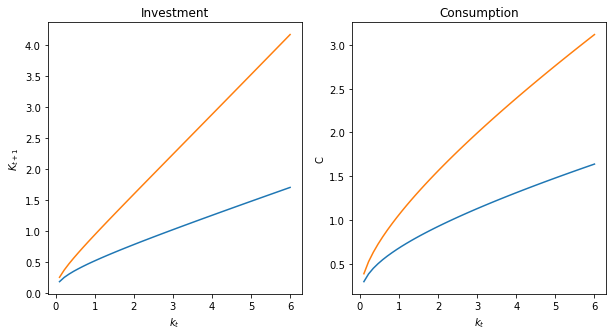

In [1]:
import numpy as np
from scipy.optimize import  root as eqsolver
from scipy import interpolate

beta=.9
nbk,nba=50,100
crit,epsi=1,1e-8

### State space

Kmin=.1
Kmax=6
Kgrid=np.linspace(Kmin,Kmax,nbk)

def PL(x,Kgrid,Kp):
    t= interpolate.interp1d(Kgrid,Kp,fill_value="extrapolate")
    #t= interpolate.interp1d(Kgrid,Kp,kind="cubic",fill_value="extrapolate")
    #z= np.polyfit(Kgrid, Kp, 5)
    #t = np.poly1d(z)
    return t(x)

f= lambda x,a:  (1-a)*(.9*np.power(x,.3)+.3*x)+a*(1.1*np.power(x,.3)+.9*x)
f_p=lambda x,a: (1-a)*(.9*.3*np.power(x,-.7)+.3)+a*(1.1*.3*np.power(x,-.7)+.9)

u_p= lambda y: 1./y    

#u_p= lambda y: 4*np.power(y,-5)

def g(f,f_p,u_p,PL,Kgrid,Kp,x,j,l):
    expect_1=f_p(x,0)*u_p(f(x,0)-PL(x,Kgrid,Kp[:,0]))
    expect_2=f_p(x,1)*u_p(f(x,1)-PL(x,Kgrid,Kp[:,1]))
    expect=.5*expect_1+.5*expect_2
    V=u_p(f(Kgrid[j],l)-x)-beta*expect
    return V

crit,itera=1,0
Kp=Kmin*np.ones([nbk,nba])

while crit>epsi:
    Kp_new=np.zeros([nbk,nba])
    R=np.zeros([nbk,nba])
    for j in range(nbk):
        for l in range(2):
            obj_1=lambda x: g(f,f_p,u_p,PL,Kgrid,Kp,x,j,l)
            Kp_new[j,l]=eqsolver(obj_1,Kp[j,l]).x
            R[j,l]=obj_1(Kp_new[j,l])
    crit=np.max(np.abs(Kp_new-Kp))
    Kp=Kp_new*1.
    itera=itera+1

C=np.zeros([nbk,nba])
for i in range(nbk):    
    for j in range(nba):
        C[i,j]=f(Kgrid[i],j)-Kp_new[i,j]
        
    
    
from matplotlib import pyplot as plt        

plt.figure(1,figsize=(10, 5))
plt.subplot(121)
plt.plot(Kgrid,Kp_new[:,0]) 
plt.plot(Kgrid,Kp_new[:,1]) 
plt.xlabel(r'$k_t$')
plt.ylabel(r'$K_{t+1}$')
plt.title('Investment')

plt.subplot(122)
plt.plot(Kgrid,C[:,0]) 
plt.plot(Kgrid,C[:,1]) 
plt.xlabel(r'$k_t$')
plt.ylabel('C')
plt.title('Consumption')
         
plt.show()    